### Extracting statistics from time series data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data.timeseries import read_data

In [2]:
#Load the data
input_file = 'data/data_2D.txt'

x1 = read_data(input_file, 2)
x2 = read_data(input_file, 3)

In [3]:
#Create pandas dataframe for slicing
data = pd.DataFrame({'dim1': x1, 'dim2': x2})

In [5]:
print('Maximum values for each dimension')
print(data.max())

print('\nMinimum values for each dimension')
print(data.min())

Maximum values for each dimension
dim1    99.98
dim2    99.97
dtype: float64

Minimum values for each dimension
dim1    0.18
dim2    0.16
dtype: float64


In [6]:
print('Overall mean')
print(data.mean())

print('\nRow-wise mean for the first 12 rows')
print(data.mean(1)[:12])

Overall mean
dim1    49.030541
dim2    50.983291
dtype: float64

Row-wise mean for the first 12 rows
1900-01-31    85.595
1900-02-28    75.310
1900-03-31    27.700
1900-04-30    44.675
1900-05-31    31.295
1900-06-30    44.160
1900-07-31    67.415
1900-08-31    56.160
1900-09-30    51.495
1900-10-31    61.260
1900-11-30    30.925
1900-12-31    30.785
Freq: M, dtype: float64


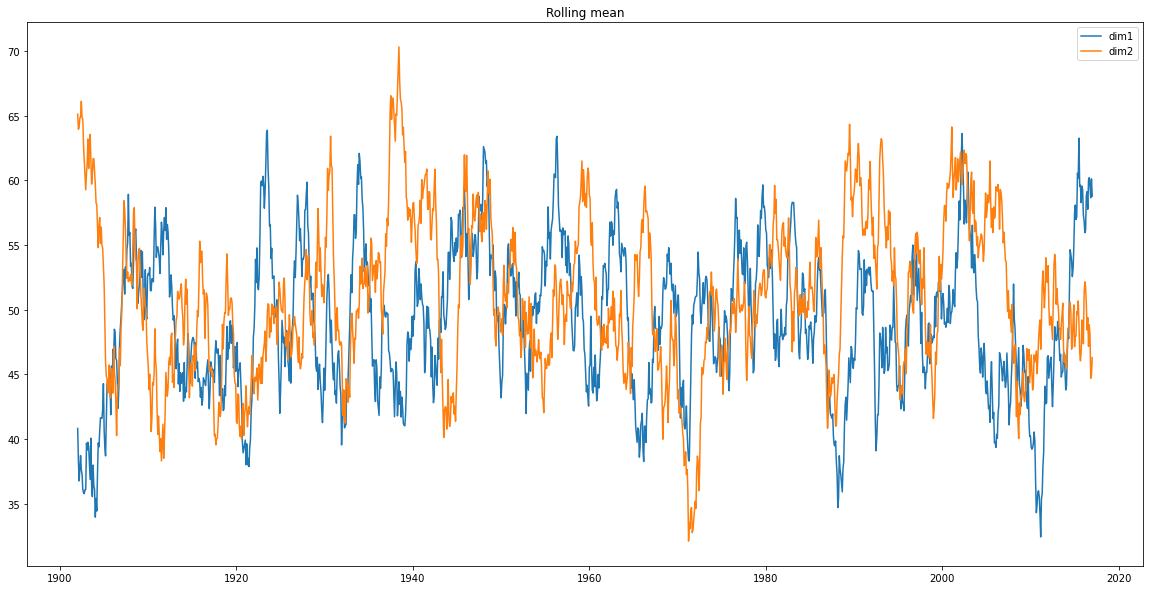

In [27]:
#Plot the rolling mean using a window size of 24
fig, ax = plt.subplots(figsize = (20, 10))
plt.title('Rolling mean')

lines = ax.plot(data.rolling(center = False, window = 24).mean())
ax.legend(lines[:2], ['dim1', 'dim2']);

In [23]:
print(f'Correlation coefficients:\n{data.corr()}')

Correlation coefficients:
         dim1     dim2
dim1  1.00000  0.00627
dim2  0.00627  1.00000


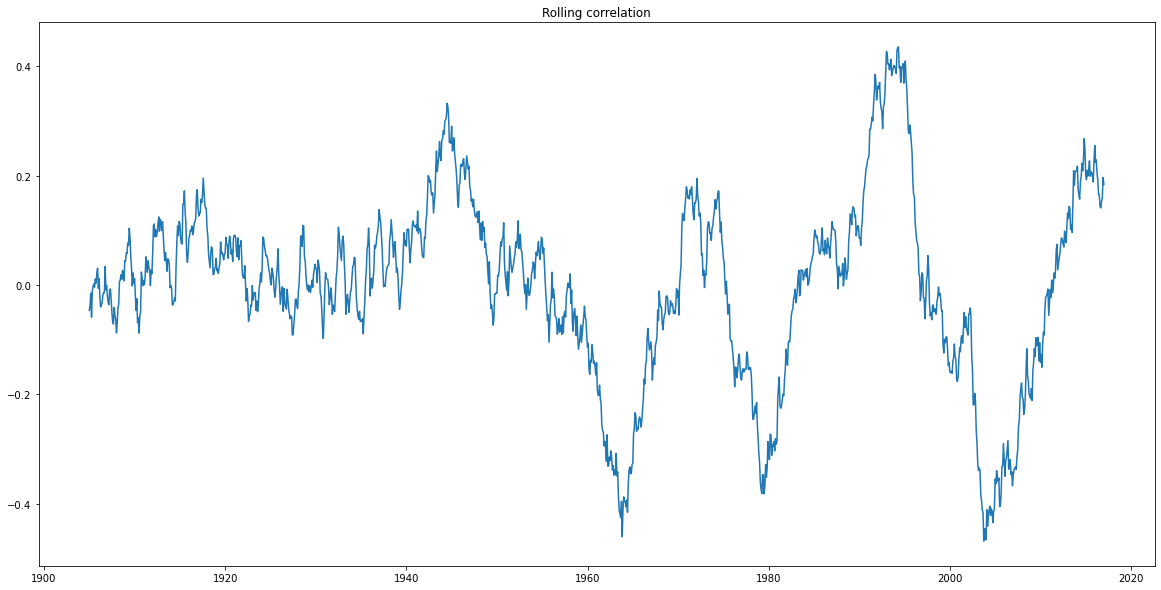

In [28]:
#Plot the rolling correlation using a window size of 60
fig, ax = plt.subplots(figsize = (20, 10))
plt.title('Rolling correlation')

ax.plot(data['dim1'].rolling(window = 60).corr(other = data['dim2']));